## About Dataset
Context
The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

Note that all the contained accident data comes from police reports, so this data does not include minor incidents.

## Inspiration
How has changing traffic flow impacted accidents?
Can we predict accident rates over time? What might improve accident rates?
Plot interactive maps of changing trends, e.g. How has London has changed for cyclists? 
Busiest roads in the nation?
Which areas never change and why? 
Identify infrastructure needs, failings and successes.
How have Rural and Urban areas differed (see RoadCategory)? 
How about the differences between England, Scotland, and Wales?
The UK government also like to look at miles driven. You can do this by multiplying the AADF by the corresponding length of road (link length) and by the number of days in the years. What does this tell you about UK roads?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_object_dtype, is_numeric_dtype, is_bool_dtype
pd.set_option('display.max_columns',33)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('accidents_2005_to_2007.csv')
df2 = pd.read_csv('accidents_2009_to_2011.csv')
df3 = pd.read_csv('accidents_2012_to_2014.csv')
AADF = pd.read_csv('ukTrafficAADF.csv')

#### Now we got three different datasets. We would like to unite them and find common columns for consistent analysis and modelling.

In [3]:
df_conc = pd.concat([df1,df2,df3],axis = 0)

In [4]:
df_conc

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,NaN,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
df_conc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [6]:
(df_conc.isnull().sum()/len(df_conc))%100

Accident_Index                                 0.000000
Location_Easting_OSGR                          0.000067
Location_Northing_OSGR                         0.000067
Longitude                                      0.000067
Latitude                                       0.000067
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.000078
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_limit                                    0

#### This function benefits filling null values.

In [7]:
def filler(data,column):   
    if (is_numeric_dtype(data[column]) == True):
        data[column] = data[column].fillna(data[column].mean())
    elif (is_object_dtype(data[column]) == True):
        data[column] = data[column].fillna(data[column].mode()[0])  
    return data  

#### We have to organize our datasets and work with columns that more specific for clear study.

In [8]:
filler(df_conc,'Location_Easting_OSGR')
filler(df_conc,'Location_Northing_OSGR')
filler(df_conc,'Longitude')
filler(df_conc,'Latitude')
filler(df_conc,'Pedestrian_Crossing-Human_Control')
filler(df_conc,'Pedestrian_Crossing-Physical_Facilities')
filler(df_conc,'Weather_Conditions')
filler(df_conc,'Road_Surface_Conditions')
filler(df_conc,'Special_Conditions_at_Site')
filler(df_conc,'Carriageway_Hazards')
filler(df_conc,'Did_Police_Officer_Attend_Scene_of_Accident')
df_conc['Junction_Control'] = df_conc['Junction_Control'].fillna('No information')
df_conc['Time'] = df_conc['Time'].astype(str)
df_conc['Time'] = df_conc['Time'].apply(lambda x : x[:2])
df_conc['Time'] = df_conc['Time'].replace('na',df_conc['Time'].mode()[0])
df_conc['Time'] = df_conc['Time'].astype(int)
df_conc['Date'] = pd.to_datetime(df_conc['Date'])
df_conc['Month'] = df_conc['Date'].apply(lambda x : x.month)
df_conc.drop(['Junction_Detail','LSOA_of_Accident_Location','Date','1st_Road_Number','2nd_Road_Number','Local_Authority_(District)',
        'Local_Authority_(Highway)','Police_Force'],axis = 1,inplace = True)
df_conc.dropna(inplace = True)
AADF.drop(['CP','Estimation_method', 'Estimation_method_detailed','LinkLength_miles','Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs','Road','LocalAuthority','StartJunction','EndJunction','Lat','Lon','Easting','Northing'],axis = 1,inplace = True)

In [9]:
(df_conc.isnull().sum()/len(df_conc))%100

Accident_Index                                 0.0
Location_Easting_OSGR                          0.0
Location_Northing_OSGR                         0.0
Longitude                                      0.0
Latitude                                       0.0
Accident_Severity                              0.0
Number_of_Vehicles                             0.0
Number_of_Casualties                           0.0
Day_of_Week                                    0.0
Time                                           0.0
1st_Road_Class                                 0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Junction_Control                               0.0
2nd_Road_Class                                 0.0
Pedestrian_Crossing-Human_Control              0.0
Pedestrian_Crossing-Physical_Facilities        0.0
Light_Conditions                               0.0
Weather_Conditions                             0.0
Road_Surface_Conditions        

In [10]:
(AADF.isnull().sum()/len(AADF))%100

AADFYear            0.0
Region              0.0
RoadCategory        0.0
LinkLength_km       0.0
PedalCycles         0.0
AllMotorVehicles    0.0
dtype: float64

#### Now we got clean dataset so we can do some analysis and visualizations. 

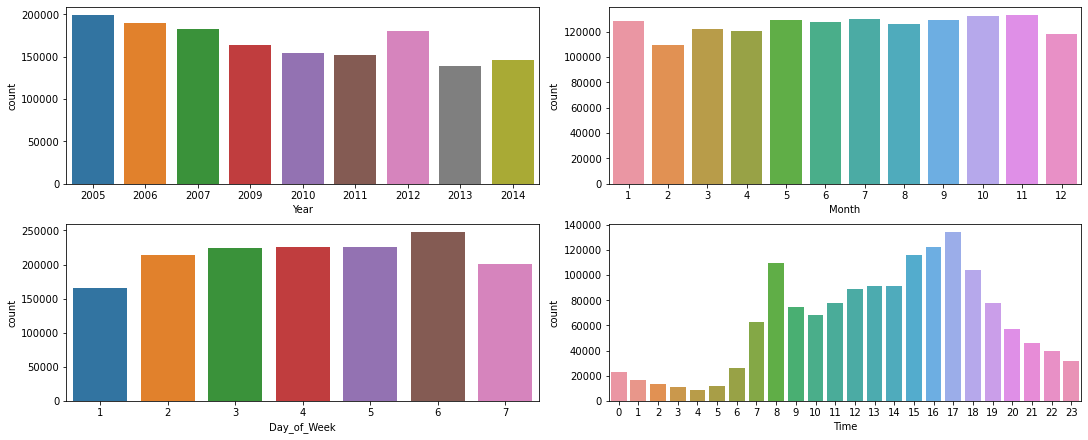

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,6)) 

sns.countplot(ax = axs[0,0], x = 'Year',data = df_conc) 


sns.countplot(ax = axs[0,1], x = 'Month', data = df_conc) 


sns.countplot(ax = axs[1,0], x = 'Day_of_Week', data = df_conc) 


sns.countplot(ax = axs[1,1], x = df_conc['Time'].sort_values(ascending = False), data = df_conc) 

plt.show()

#### The graphs shows us the time periods which have most accident. We can see that in the year graph, there is a falling trend until 2012 so we have to look at 2012 for extraordinary events or we need to chech if there is a dublicate situation in our dataset.    

In [12]:
df_conc = df_conc.drop_duplicates(subset=['Accident_Index','Time','Longitude','Latitude','Location_Easting_OSGR','Location_Northing_OSGR'], keep='first')

### Now we dropped rows with dublicates let's check if there are dublicate rows.

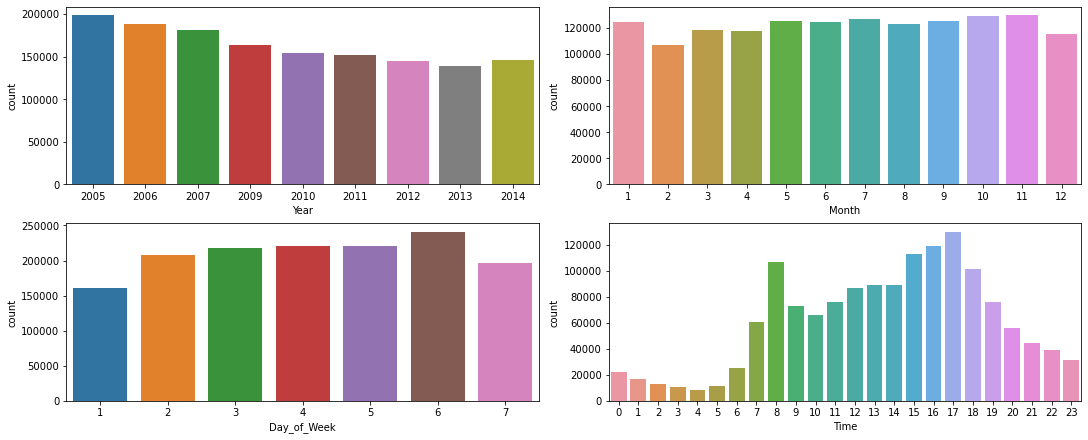

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,6)) 

sns.countplot(ax = axs[0,0], x = 'Year',data = df_conc) 


sns.countplot(ax = axs[0,1], x = 'Month', data = df_conc) 


sns.countplot(ax = axs[1,0], x = 'Day_of_Week', data = df_conc) 


sns.countplot(ax = axs[1,1], x = df_conc['Time'].sort_values(ascending = False), data = df_conc) 

plt.show()

### We can see that there is a huge decrease at 2012. Now we got a correct dataset. 

Now we look at the other graphs. In Month graph we can see that there is a balanced distribution, it does not gives us any ideas. In the day of week graph we can see that Monday has the lowest accident number and Saturday has the highest accident number. In the Time(hours) graph we can see that 08.00 o'clock and between 15.00-18.00 o'clock have the highest accident number. We can say that the pre-work and after-work time periods has an effect on accident number.

## Let's check the other factors.
## At first we need to look at distributions then we need to look at relations and correlations between factors.

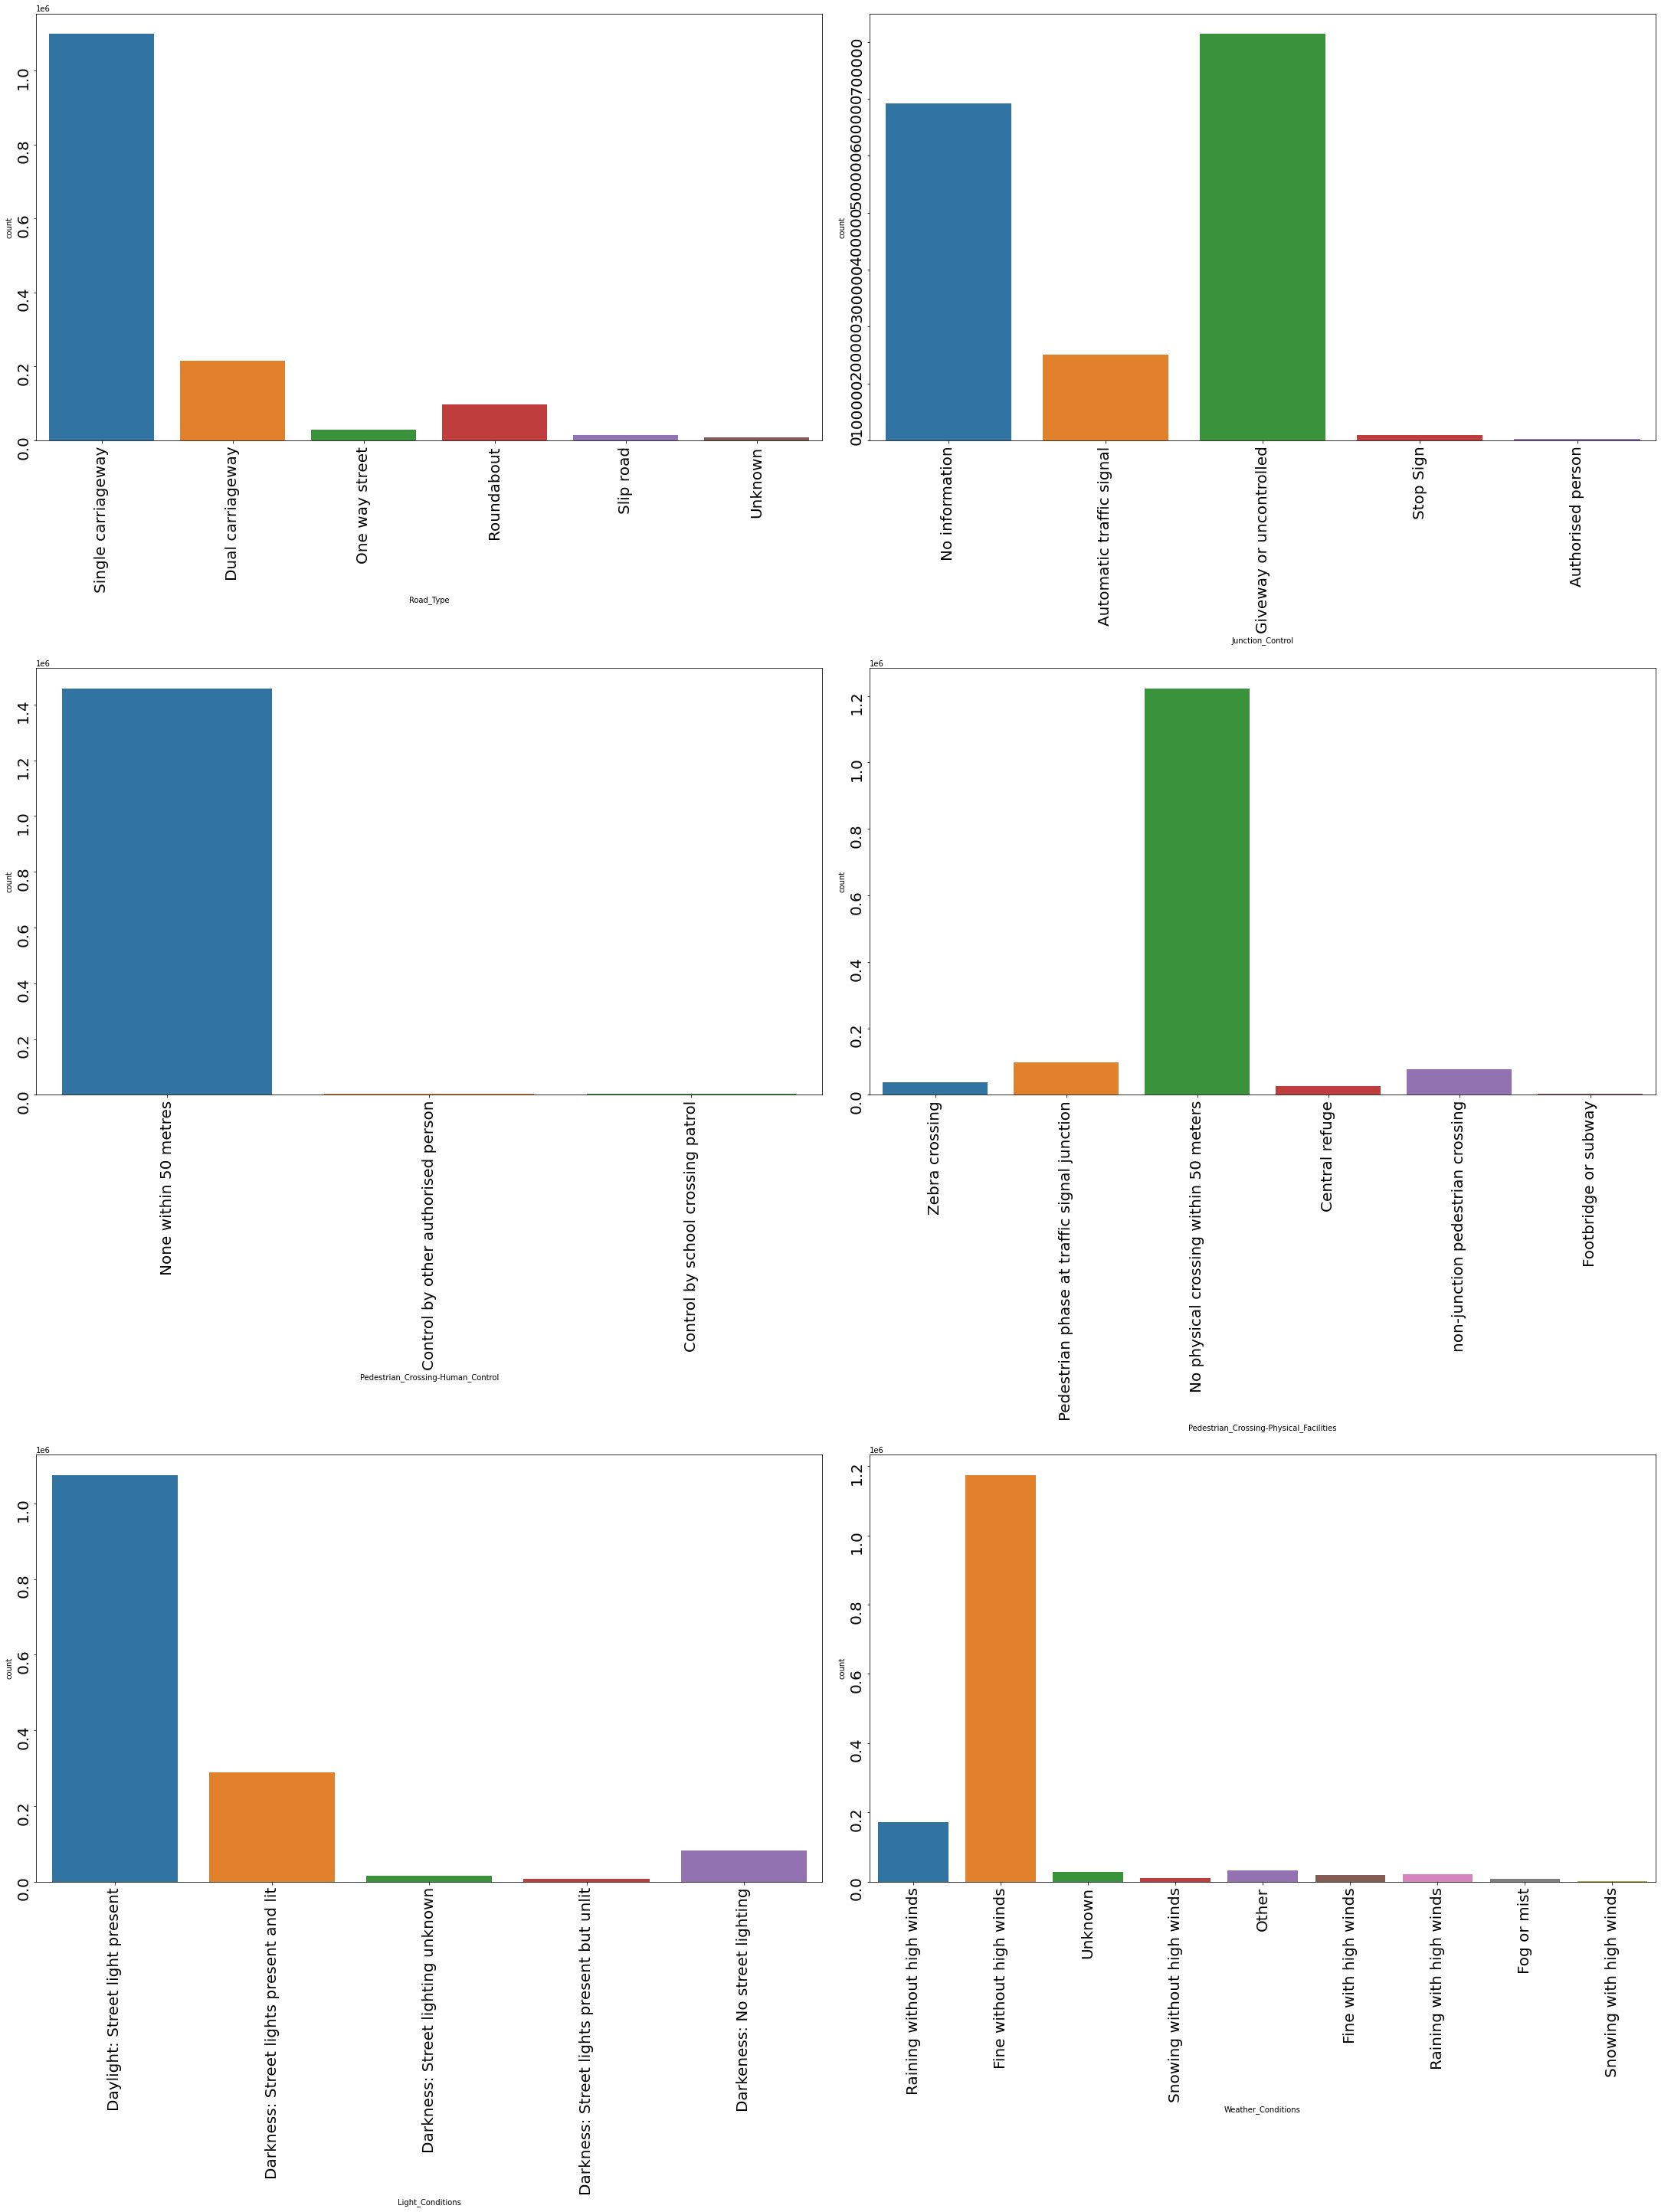

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(30,40)) 

sns.countplot(ax = axs[0,0], x = df_conc['Road_Type'] , data = df_conc) 

sns.countplot(ax = axs[0,1], x = df_conc['Junction_Control'], data = df_conc) 

sns.countplot(ax = axs[1,0], x = df_conc['Pedestrian_Crossing-Human_Control'] , data = df_conc) 

sns.countplot(ax = axs[1,1], x = df_conc['Pedestrian_Crossing-Physical_Facilities'], data = df_conc) 

sns.countplot(ax = axs[2,0], x = df_conc['Light_Conditions'], data = df_conc) 

sns.countplot(ax = axs[2,1], x = df_conc['Weather_Conditions'], data = df_conc) 

axs[0,0].tick_params(labelrotation=90,labelsize = 20)

axs[0,1].tick_params(labelrotation=90,labelsize = 20)

axs[1,0].tick_params(labelrotation=90,labelsize = 20)

axs[1,1].tick_params(labelrotation=90,labelsize = 20)

axs[2,0].tick_params(labelrotation=90,labelsize = 20)

axs[2,1].tick_params(labelrotation=90,labelsize = 20)


plt.show()


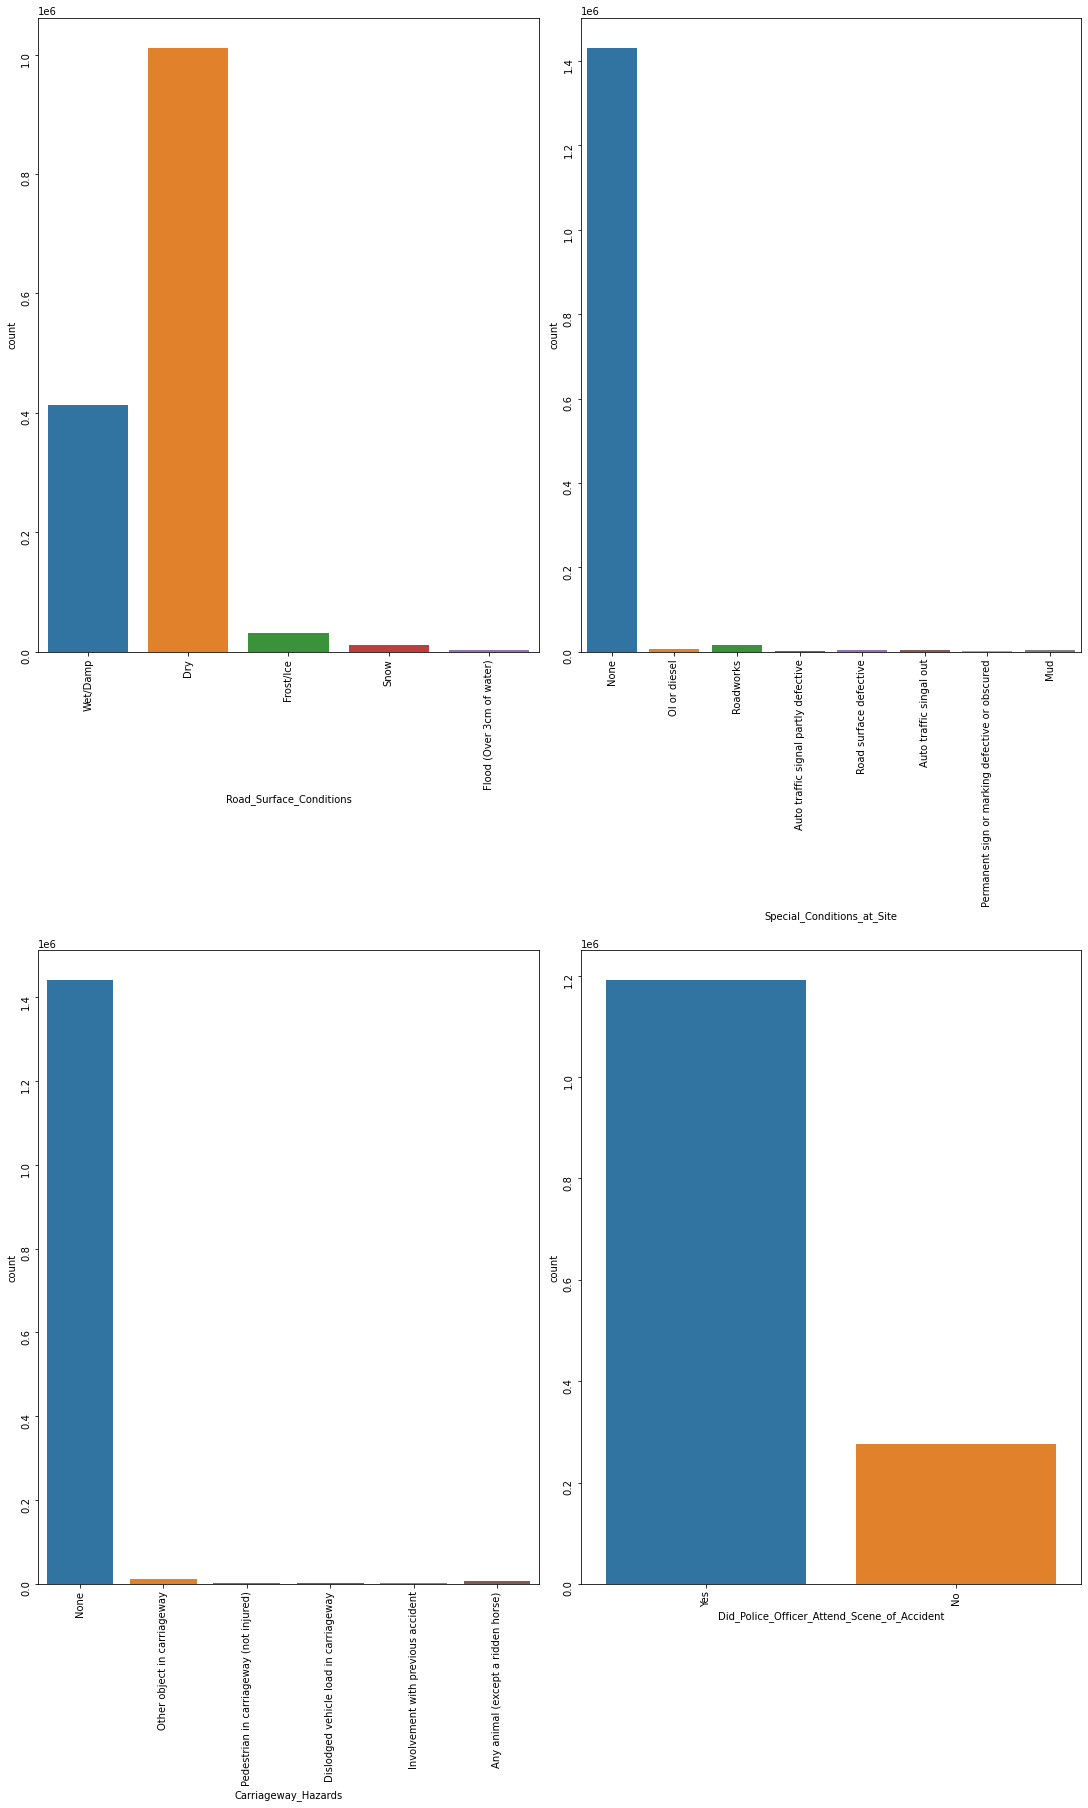

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,25)) 

sns.countplot(ax = axs[0,0], x = df_conc['Road_Surface_Conditions'], data = df_conc) 

sns.countplot(ax = axs[0,1], x = df_conc['Special_Conditions_at_Site'], data = df_conc) 

sns.countplot(ax = axs[1,0], x = df_conc['Carriageway_Hazards'] , data = df_conc) 

sns.countplot(ax = axs[1,1], x = df_conc['Did_Police_Officer_Attend_Scene_of_Accident'], data = df_conc) 

axs[0,0].tick_params(labelrotation=90)

axs[0,1].tick_params(labelrotation=90)

axs[1,0].tick_params(labelrotation=90)

axs[1,1].tick_params(labelrotation=90)

plt.show()

###  As it shown in the graphs we can have some conclusions about accidents. If there is no control or authorite around, the probability for accident is relatively higher. So the signs, autorhorized persons, precautions exc. must be more common and frequent in the roads and highways. For better results we have to examine the daily weather conditions day by day and rate of accidents for different weather conditions. 

## Now let's look at the relations between factors.

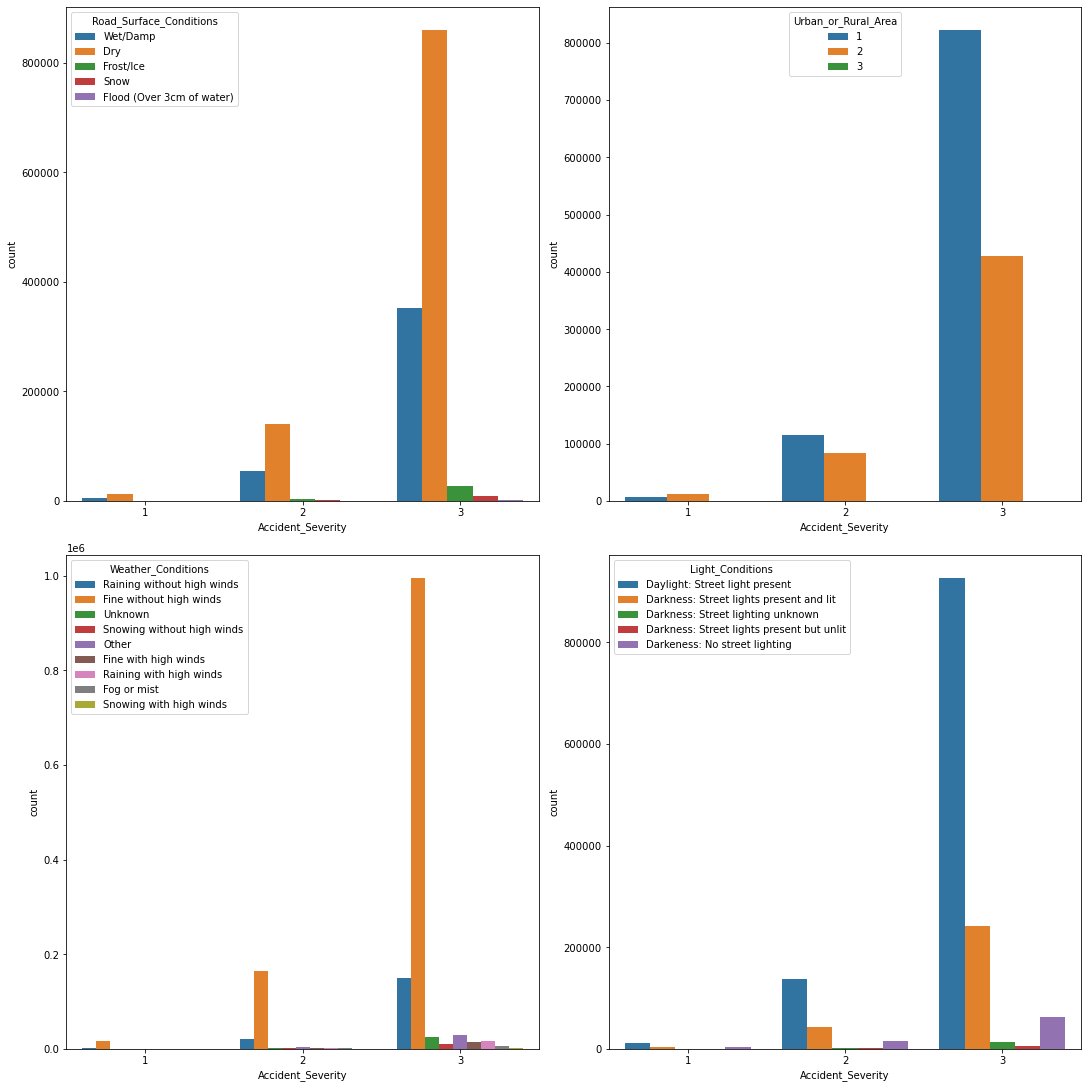

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,15)) 

sns.countplot(ax = axs[0,0], x='Accident_Severity', hue = 'Road_Surface_Conditions', data = df_conc)

sns.countplot(ax = axs[0,1], x='Accident_Severity', hue = 'Urban_or_Rural_Area', data = df_conc)

sns.countplot(ax = axs[1,0], x='Accident_Severity', hue = 'Weather_Conditions' , data = df_conc)

sns.countplot(ax = axs[1,1], x='Accident_Severity', hue = 'Light_Conditions' , data = df_conc)

plt.show()

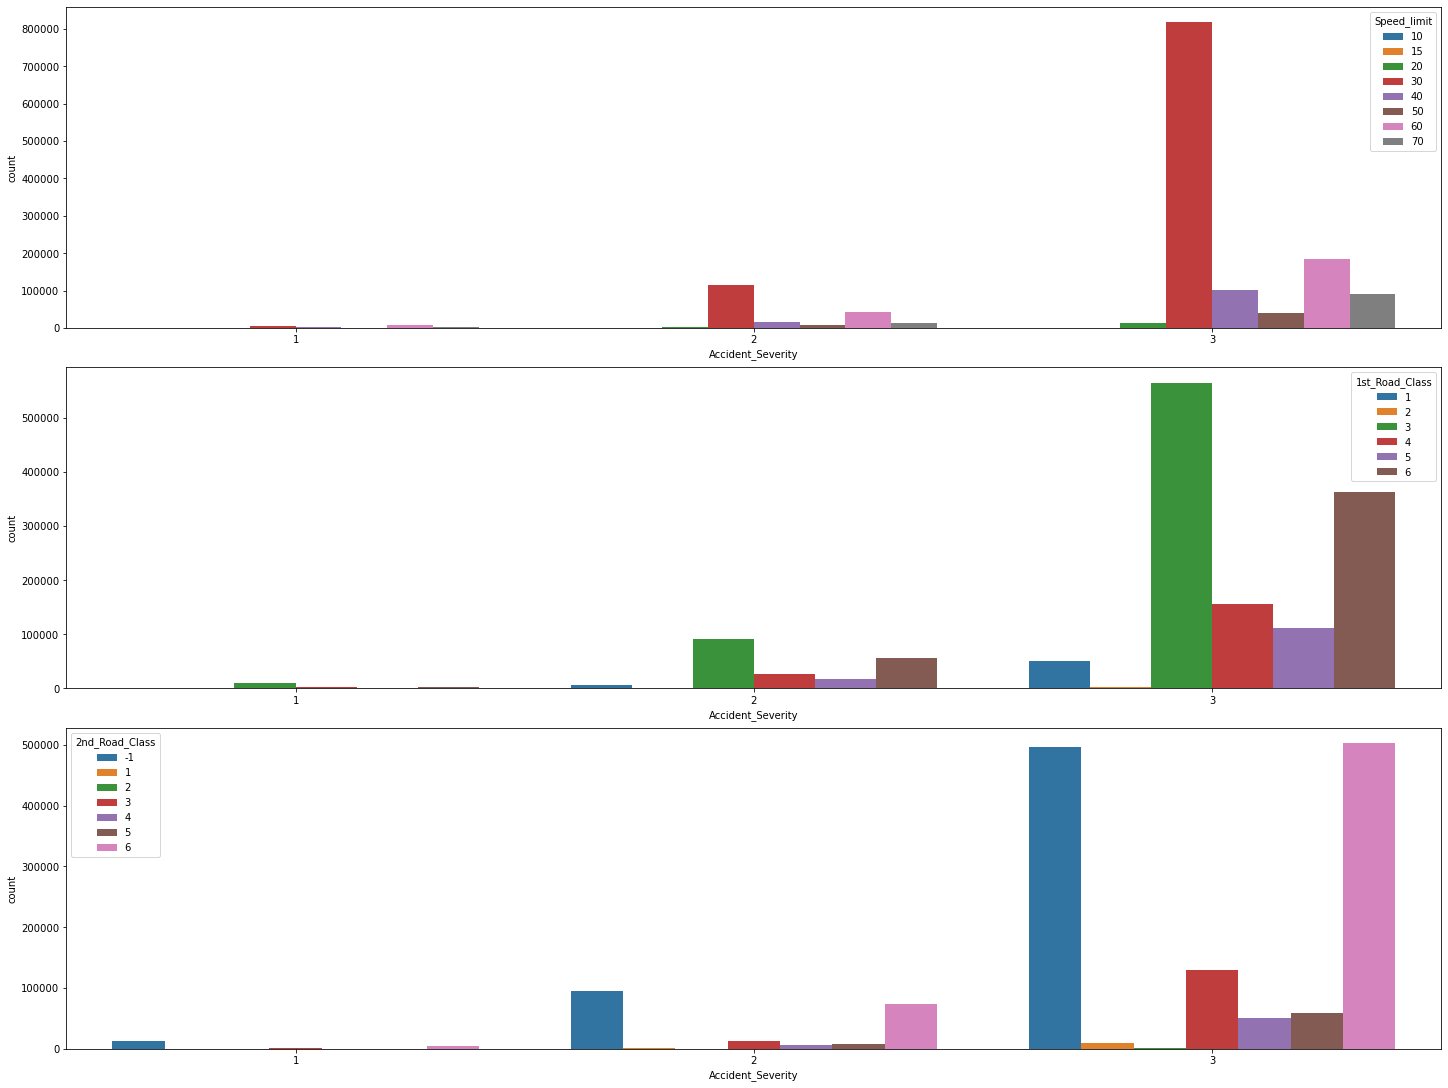

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(20,15)) 

sns.countplot(ax = axs[0],hue='Speed_limit', x = 'Accident_Severity', data = df_conc)

sns.countplot(ax = axs[1], x='Accident_Severity', hue = '1st_Road_Class', data = df_conc)

sns.countplot(ax = axs[2], x='Accident_Severity', hue = '2nd_Road_Class' , data = df_conc)

plt.show()


### Now look at the relations with number of vehicles and number of accidents per year.

In [18]:
mean_list = [] #This is the list of mean vehicle number per year.
for i in AADF['AADFYear'].value_counts().index.sort_values(ascending = False):
    mean_list.append(AADF[(AADF['AADFYear']==i)&(AADF['AllMotorVehicles'])]['AllMotorVehicles'].mean())
year_list = [] #This is the list of years.
for i in AADF['AADFYear'].value_counts().index.sort_values(ascending = False):
    year_list.append(i)

Text(0.5, 1.0, 'Number Of Accidents Per Year')

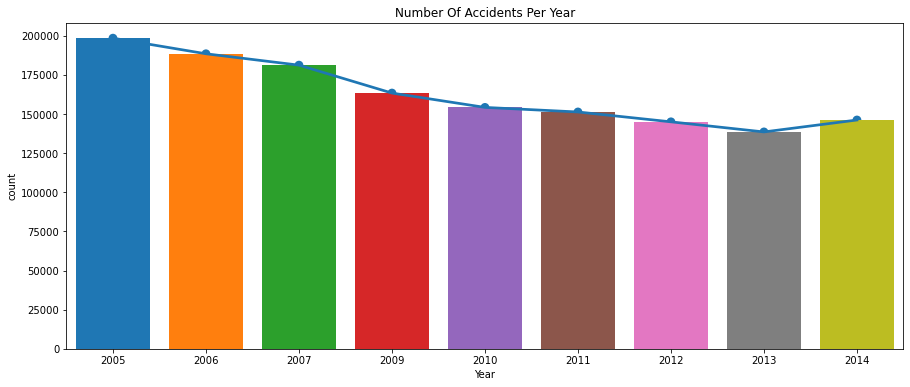

In [19]:
num_accidents = [198445, 188476, 181216, 163377, 154223, 151297,144996, 138549,146169] #This is the list of number accidents per year, order by 2005-2014
plt.figure(figsize = (15,6))
sns.countplot(x = df_conc['Year'],data = df_conc,saturation=1)
sns.pointplot(x=df_conc['Year'].value_counts().index.sort_values(),y = [198445, 188476, 181216, 163377, 154223, 151297,144996, 138549,146169])
plt.title('Number Of Accidents Per Year')

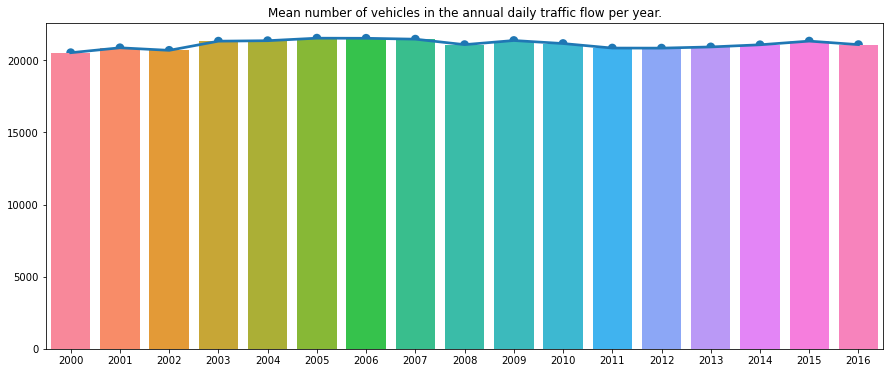

In [20]:
plt.figure(figsize = (15,6))
sns.barplot(x = year_list,y = mean_list,saturation = 1)
sns.pointplot(x=AADF['AADFYear'].value_counts().index.sort_values(ascending = False),y=mean_list)
plt.title('Mean number of vehicles in the annual daily traffic flow per year.')
plt.show()

### As it shown in the graphs despite the decrease of accidents per year, number of vehicles looks stable between 2000-2016, so we can not say that there is a high correlation.

### In this study we are going to compare the accidents in 2005 and accidents in 2014 to see whether there is a change in the frequency in accidents region by region.

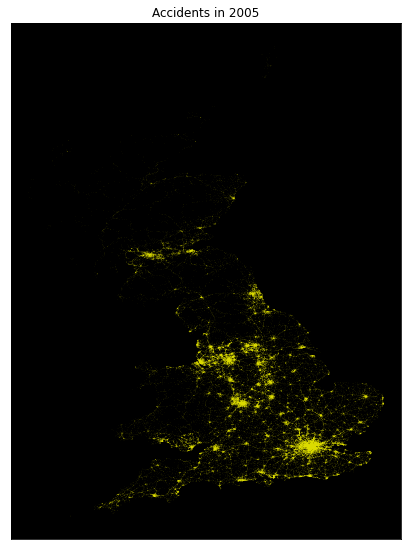

In [21]:
plt.figure(figsize=(7,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = df_conc[df_conc['Year']==2005]["Longitude"], y = df_conc[df_conc['Year']==2005]["Latitude"],s=0.01, alpha= 0.1, color="yellow")
plt.title("Accidents in 2005")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

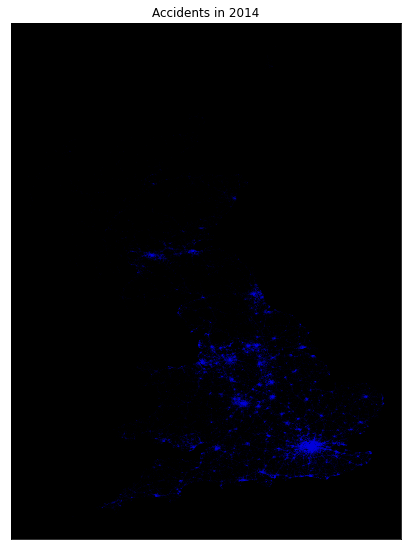

In [22]:
plt.figure(figsize=(7,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = df_conc[df_conc['Year']==2014]["Longitude"], y = df_conc[df_conc['Year']==2014]["Latitude"],s=0.01, alpha= 0.1, color="blue")
plt.title("Accidents in 2014")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

### Now we can see that there are intensity in city centers both of the years. Compare to 2005, 2014 has a decrease in number of accidents, we can observe the decrease in the graphs. In the 2014, the accidents in the rural regions decreased but in the city centers still have a intensity. Let's check our observations in the dataframe by looking at the urban and rural column.

In [23]:
_urban_2005 = df_conc[(df_conc['Year']==2005)&(df_conc['Urban_or_Rural_Area']==1)]['Urban_or_Rural_Area'].value_counts()
_rural_2005 = df_conc[(df_conc['Year']==2005)&(df_conc['Urban_or_Rural_Area']==2)]['Urban_or_Rural_Area'].value_counts()
_urban_2014 = df_conc[(df_conc['Year']==2014)&(df_conc['Urban_or_Rural_Area']==1)]['Urban_or_Rural_Area'].value_counts()
_rural_2014 = df_conc[(df_conc['Year']==2014)&(df_conc['Urban_or_Rural_Area']==2)]['Urban_or_Rural_Area'].value_counts()

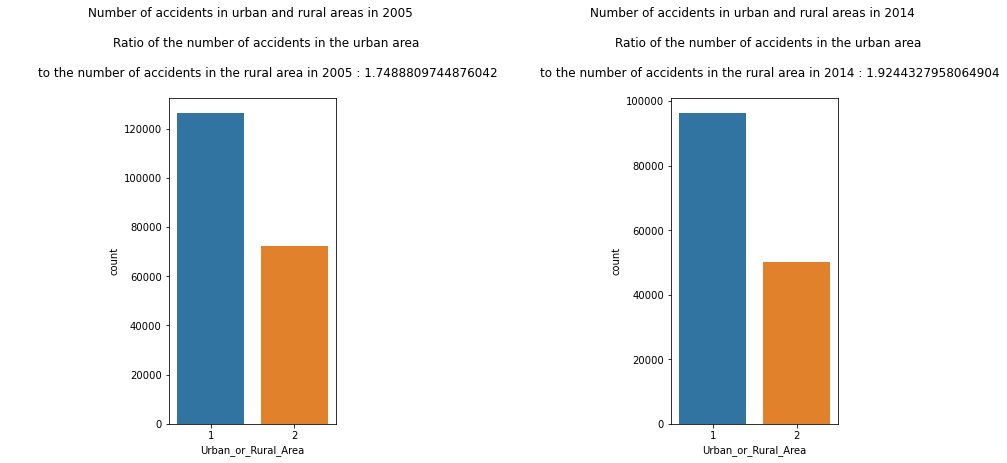

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12,6),sharex = True)

sns.countplot(ax = axs[0],x = 'Urban_or_Rural_Area',data = df_conc[df_conc['Year']==2005])
axs[0].set_title("""Number of accidents in urban and rural areas in 2005 \n
        Ratio of the number of accidents in the urban area \n
        to the number of accidents in the rural area in 2005 : {}
                """.format(_urban_2005.values[0]/_rural_2005.values[0]))


sns.countplot(ax = axs[1],x = 'Urban_or_Rural_Area',data = df_conc[df_conc['Year']==2014])
axs[1].set_title("""Number of accidents in urban and rural areas in 2014 \n
        Ratio of the number of accidents in the urban area \n
        to the number of accidents in the rural area in 2014 : {}
                """.format(_urban_2014.values[0]/_rural_2014.values[0]))

plt.subplots_adjust(wspace=2)
plt.show()

### Ratio of the number of accidents in the urban area to the number of accidents in the rural area has increased in 2014 compare to 2005 despite to the number of both areas number has descreased compare to 2005. So we can say that the strategies, rules or factors in the traffic has made a success in the both areas but in the urban, those factors has made more success relate to rural.
       

### Now we need to look at the most common combinations of factors that cause an accident.

In [25]:
columns_ = ['Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties','Time', '1st_Road_Class',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',]

combinations = df_conc[columns_].groupby(columns_).size().sort_values(ascending=False)
common_combinations = pd.DataFrame(combinations).head()
common_combinations['Frequency'] = common_combinations[0]
common_combinations.drop(0,axis = 1 ,inplace = True)

rare_combinations = pd.DataFrame(combinations).tail()
rare_combinations['Frequency'] = rare_combinations[0]
rare_combinations.drop(0,axis = 1 ,inplace = True)


## These are the most common combinations of different factors that cause an accident.

In [26]:
common_combinations

Frequency
Accident_Severity Number_of_Vehicles Number_of_Casualties Time 1st_Road_Class Road_Type          Speed_limit Junction_Control        2nd_Road_Class Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities Light_Conditions               Weather_Conditions      Road_Surface_Conditions Special_Conditions_at_Site Carriageway_Hazards Urban_or_Rural_Area           
3                 2                  1                    17   6              Single carriageway 30          Giveway or uncontrolled  6             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present Fine without high winds Dry                     None                       None                1                         3602
                                                          16   6              Single carriageway 30          Giveway or uncontrolled  6             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present Fine without high winds Dry                     None                       None                1                         3534
                                                          15   6              Single carriageway 30          Giveway or uncontrolled  6             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present Fine without high winds Dry                     None                       None                1                         3522
                                                          8    6              Single carriageway 30          Giveway or uncontrolled  6             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present Fine without high winds Dry                     None                       None                1                         3180
                  1                  1                    15   6              Single carriageway 30          No information          -1             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present Fine without high winds Dry                     None                       None                1                         3010

## These are the rarest combinations of different factors that cause an accident.

In [27]:
rare_combinations

Frequency
Accident_Severity Number_of_Vehicles Number_of_Casualties Time 1st_Road_Class Road_Type        Speed_limit Junction_Control 2nd_Road_Class Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities Light_Conditions                        Weather_Conditions         Road_Surface_Conditions Special_Conditions_at_Site Carriageway_Hazards Urban_or_Rural_Area           
3                 1                  1                    21   3              Dual carriageway 40          No information   -1             None within 50 metres             No physical crossing within 50 meters   Darkness: Street lights present and lit Fine with high winds       Dry                     None                       None                1                            1
                                                                                                                                                                                                                     Darkness: Street lighting unknown       Unknown                    Dry                     None                       None                2                            1
                                                                                                                                                                                                                                                                                                                                                               1                            1
                                                                                                                                                                                                                     Darkeness: No street lighting           Raining without high winds Wet/Damp                None                       None                2                            1
                  32                 5                    8    3              Dual carriageway 70          No information   -1             None within 50 metres             No physical crossing within 50 meters   Daylight: Street light present          Fine without high winds    Frost/Ice               None                       None                2                            1

### Now we are going to build a model but for the predicting probabilities for an accident happening, we need data about the situations that there are no accidents. So in this study we are going to try to predict "Accident Severity".

In [28]:
X = df_conc.drop(['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Year','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Severity'],axis = 1)
y = df_conc['Accident_Severity']

In [29]:
y = y.map({1:0,2:1,3:2}) #This is for optimization problems with the machine learning algorithm.
y = y.ravel()

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [31]:
X_obj_columns = ['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards']

In [32]:
for column in X_obj_columns:
    X[column] = le.fit_transform(X[column])

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
df_conc['Accident_Severity'].value_counts()

3    1249137
2     198591
1      19020
Name: Accident_Severity, dtype: int64

### Our target data's distribution is unbalanced now. We are going to make it equal by RandomOverSampler function. 

In [36]:
from imblearn.over_sampling import RandomOverSampler # 1's and 0's are unbalanced now so we will make them equal.

randomsampler = RandomOverSampler()

X_train,y_train = randomsampler.fit_resample(X_train,y_train)

X_train = pd.DataFrame(X_train).sample(frac=0.3, random_state=5)
y_train = pd.DataFrame(y_train).sample(frac=0.3, random_state=5)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [38]:
lr = LogisticRegression(max_iter=10000)
rfc = RandomForestClassifier(n_estimators=30,max_depth=None,)
ada = AdaBoostClassifier()
xgb = XGBClassifier()
tree = DecisionTreeClassifier()

In [39]:
X_test = pd.DataFrame(X_test)

In [40]:
models = [lr,rfc,ada,xgb,tree]

for model in models:
    model_fit = model.fit(X_train,y_train)
    model_score = model_fit.score(X_test,y_test)
    print(""" The score of {} is {}  

      """.format(model,model_score))

 The score of LogisticRegression(max_iter=10000) is 0.5235622975967275  

      
 The score of RandomForestClassifier(n_estimators=30) is 0.7245065621271519  

      
 The score of AdaBoostClassifier() is 0.5434429861939662  

      
 The score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 0.5645645133799216  

      
 The sc

### It looks like our model with the best result is RandomForestClassifier. Still it has not a perfect score but it is the best of we have.

In [41]:
rfc_fit = rfc.fit(X_train,y_train)
rfc_pred = rfc_fit.predict(X_test)

In [42]:
print(confusion_matrix(rfc_pred,y_test))

[[    96    424   1103]
 [  1810  13265  49529]
 [  1949  26140 199034]]


In [43]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.02      0.06      0.04      1623
           1       0.33      0.21      0.25     64604
           2       0.80      0.88      0.83    227123

    accuracy                           0.72    293350
   macro avg       0.39      0.38      0.37    293350
weighted avg       0.69      0.72      0.70    293350



# Conclusions 

#### In this study we intercept the factors of the accidents in the traffic and we had some conclusions. The traffic accidents have a decreasing trend through years, accidents does not depend on the traffic flow but the traffic rules, signs, authorised persons. The data we have does not gives us necessary informations for the accidents ratings relate factors, we can not make strong predictions about the accident severity to. City centers have the most number of accidents, especially London. Rural areas have less number of accidents and it sounds pretty logical. Most of the accidents have similar situations, some factors are raid to the other factors and those factors are generally includes normal conditions. So accidents are a part of our daily life, they does not depend special conditions. 